In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## plotting stuff
plt.rcParams['figure.figsize'] = [15,9]
plt.rcParams['figure.dpi'] = 150
plt.rcParams["xtick.labelsize"] = 20

## Read Data

In [3]:
algo = pd.read_excel('algo.xlsx')

In [4]:
df = algo.copy()

In [5]:
df.head()

,Group#,Student,E-mail,Allocation#,Algorithm ID#,Firm that developed this biased algorithm,Category of algorithm,Theme of algorithm,Algorithm name,Reference-1,...,[22a]. Governance and control mechanisms-Justification & Reference(s),[23]. Choice of supervised vs. unsupervised learning algorithms,[23a]. Choice of supervised vs. unsupervised learning algorithms-Justification & Reference(s),[24]. Choice of automation vs. augmentation of decision making,[24a]. Choice of automation vs. augmentation of decision making-Justification & Reference(s),[25]. Algorithm audits,[25a]. Algorithm audits-Justification & Reference(s),[26]. Magnitude of damage,[26a]. Magnitude of damage-Justification & Reference(s),Unnamed: 60
0,Enter group number,Student responsible for analysis of a given al...,E-mail of student,Allocation#,Unique Algorithm ID#,Enter the name of the firm that developed this...,Category of algorithm,Enter theme of algorithm (Revise the tentative...,Enter the name of the biased algorithm (Revise...,Teaching team provided at least one reference ...,...,§ Provide a justification for your evaluation ...,Some algorithms use “supervised learning” wher...,§ Provide a justification for your evaluation ...,Some algorithms fully automate the decisions t...,§ Provide a justification for your evaluation ...,For each algorithm in your list:\n • Evaluate ...,§ Provide a justification for your evaluation ...,"When a bias emerges in an algorithm, it can ca...",§ Provide a justification for your evaluation ...,NaN
1,1,ARYA; SHIVANG,Shivang.Arya@utexas.edu,1,1,Fitbit,Healthcare,Medicine / health care,Heart rate tracking algorithms,https://www.statnews.com/2019/07/24/fitbit-acc...,...,\nJustification: Fitbit did test just not enou...,2,Justification: The algorithm was learning the ...,2,Justification: The algorithm was learning the ...,1,Justification: Fitbit had audits of the algori...,1,Justification: Fitbit did not break any laws i...,NaN
2,1,ARYA; SHIVANG,Shivang.Arya@utexas.edu,2,2,23 and me,Healthcare,determine ancestry,analyze your genes to find your ancestry,https://qz.com/765879/23andme-has-a-race-probl...,...,Justification: Mountain from 23andMe said yes ...,1,Justification: The algorithm was trained on bi...,2,Justification: The algorithm automates the pro...,1,Justification: Mountain from 23andMe said yes ...,2,Justification: 23andMe falsely advertises that...,NaN
3,1,ARYA; SHIVANG,Shivang.Arya@utexas.edu,3,3,University of Chicago,Healthcare,Length of stay prediction algorithm,Decrease the stay of hospital patients by iden...,https://www.forbes.com/sites/insights-intelai/...,...,Justification: There was controlled and govere...,0,Justification: The algorithm was trained prope...,1,Justification: The algorithm was meant to help...,2,Justification: There were internal audits and ...,0,Justification: The model was never commerciali...,NaN
4,1,LIU; WILSHIRE,wilshire.liu@utexas.edu,4,4,Winterlight Labs,Healthcare,Medicine / health care,NLP Alzheimer's Detection,https://qz.com/1367177/if-ai-is-going-to-be-th...,...,Justification: They use security controls as s...,0,Justification: Algorithm only uses logistic re...,1,"Justification: Algorithm is created by humans,...",0,Justification: No evidence of algorithm audits,1,"Justification: Low damages, developers will pr...",NaN


## Remove and Rename Columns

In [6]:
## drop unnecessary columns

df.drop(['Group#', 'Student', 'E-mail', 'Allocation#', 'Algorithm ID#',
       'Firm that developed this biased algorithm',
       'Theme of algorithm', 'Algorithm name', 'Reference-1', 'Reference-2',
       'Reference-3', 'Reference-4', 'Reference-5',
       '[1]. Algorithm description', '[2]. Bias description',
       '[3]. Bias evaluation and justification',
       '[4]. Is it feasible to study this firm?', '[5]. Year of development',
       '[6]. Year of bias',
       '[7a]. Upstream technology bias justification',
       '[8a]. Training data bias justification',
       '[9a]. Developer bias justification',
       '[10a]. Model bias justification',
       '[11a]. Unilateral optimization bias justification',
       '[12a]. Law subversion bias justification',
       '[13a]. User bias justification',
       '[14a]. Context bias justification',
       '[15a]. Automation bias justification',
       '[16a]. Board-level oversight of algorithmic bias-Justification & Reference(s)',
       '[17a]. Commitment to ethical, responsible algorithm development-Justification & Reference(s)',
       '[18a]. Algorithmic Accountability-Justification & Reference(s)',
       '[19a]. Algorithmic Transparency-Justification & Reference(s)',
       '[20a]. Diversity of algorithmic development teams-Justification & Reference(s)',
       '[21a]. FACT Principles-Justification & Reference(s)',
       '[22a]. Governance and control mechanisms-Justification & Reference(s)',
       '[23a]. Choice of supervised vs. unsupervised learning algorithms-Justification & Reference(s)',
       '[24a]. Choice of automation vs. augmentation of decision making-Justification & Reference(s)',
       '[25a]. Algorithm audits-Justification & Reference(s)',
       '[26a]. Magnitude of damage-Justification & Reference(s)',
       'Unnamed: 60'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Category of algorithm', '[7]. Upstream technology bias',
       '[8]. Training data bias', '[9]. Developer bias', '[10]. Model bias',
       '[11]. Unilateral optimization bias', '[12]. Law subversion bias',
       '[13]. User bias', '[14]. Context bias', '[15]. Automation bias',
       '[16]. Board-level oversight of algorithmic bias',
       '[17]. Commitment to ethical, responsible algorithm development',
       '[18]. Algorithmic Accountability', '[19]. Algorithmic Transparency',
       '[20]. Diversity of algorithmic development teams',
       '[21]. FACT Principles', '[22]. Governance and control mechanisms',
       '[23]. Choice of supervised vs. unsupervised learning algorithms',
       '[24]. Choice of automation vs. augmentation of decision making',
       '[25]. Algorithm audits', '[26]. Magnitude of damage'],
      dtype='object')

In [8]:
# rename columns for readability

df.columns = ['Category', 'Upstream technology bias', 'Training data bias',
       'Developer bias', 'Model bias',
       'Unilateral bias', 'Law bias',
       'User bias', 'Context bias', 'Automation bias',
       'Board-level oversight',
       'Ethical development',
       'Algorithmic Accountability', 'Algorithmic Transparency',
       'Diversity of teams',
       'FACT Principles', 'Governance',
       'supervised unsupervised',
       'automation augmentation',
       'Algorithm audits', 'Magnitude of damage']

In [9]:
df = df[1:]
df.head()

,Category,Upstream technology bias,Training data bias,Developer bias,Model bias,Unilateral bias,Law bias,User bias,Context bias,Automation bias,...,Ethical development,Algorithmic Accountability,Algorithmic Transparency,Diversity of teams,FACT Principles,Governance,supervised unsupervised,automation augmentation,Algorithm audits,Magnitude of damage
1,Healthcare,1,0,0,1,0,0,0,1,1,...,2,2,2,0,1,1,2,2,1,1
2,Healthcare,1,1,0,1,0,1,1,1,0,...,1,1,2,1,1,1`,1,2,1,2
3,Healthcare,0,1,0,1,0,0,0,1,0,...,1,2,2,2,2,2,0,1,2,0
4,Healthcare,0,1,0,0,1,1,0,1,0,...,0,0,2,1,0,2,0,1,0,1
5,Healthcare,0,1,0,0,1,1,0,0,0,...,1,0,1,2,0,0,0,0,0,1


In [10]:
df.isnull().sum().sum()

23

### Some Hardcoding Replacements:

In [11]:
# fix some typos for where value should be 1

df.replace('1`', 1, inplace=True)
df.replace('[1]', 1, inplace=True)

# this was my algorithm - making a change to its coding to make things bit easier
df.replace('* does not use machine learning', 0, inplace=True)

# replace other non-numerical values with most frequently occuring value in column
df.replace('-', 1, inplace=True)
df.replace('* irrelevant', 1, inplace=True)

In [12]:
for c in df.columns[1:]:
    print(df[c].value_counts())

0.0    83
1.0    31
Name: Upstream technology bias, dtype: int64
1.0    58
0.0    56
Name: Training data bias, dtype: int64
0.0    77
1.0    37
Name: Developer bias, dtype: int64
1.0    77
0.0    36
Name: Model bias, dtype: int64
0.0    64
1.0    50
Name: Unilateral bias, dtype: int64
0.0    80
1.0    34
Name: Law bias, dtype: int64
0.0    67
1.0    47
Name: User bias, dtype: int64
0.0    90
1.0    24
Name: Context bias, dtype: int64
0.0    66
1.0    48
Name: Automation bias, dtype: int64
0.0    78
1.0    26
2.0    10
Name: Board-level bias, dtype: int64
0.0    57
1.0    41
2.0    16
Name: Ethical development, dtype: int64
0.0    56
1.0    34
2.0    24
Name: Algorithmic Accountability, dtype: int64
0.0    49
1.0    37
2.0    28
Name: Algorithmic Transparency, dtype: int64
0.0    62
1.0    36
2.0    16
Name: Diversity of teams, dtype: int64
0.0    73
1.0    32
2.0     9
Name: FACT Principles, dtype: int64
0.0    69
1.0    31
2.0    14
Name: Governance, dtype: int64
0.0    60
1.0    40
2

In [13]:
df.tail()

,Category,Upstream technology bias,Training data bias,Developer bias,Model bias,Unilateral bias,Law bias,User bias,Context bias,Automation bias,...,Ethical development,Algorithmic Accountability,Algorithmic Transparency,Diversity of teams,FACT Principles,Governance,supervised unsupervised,automation augmentation,Algorithm audits,Magnitude of damage
111,Transportation,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
112,Transportation,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
113,Transportation,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0
114,Transportation,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
115,Transportation,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,4.0


In [14]:
df.shape

(115, 21)

In [15]:
df.to_csv('cleaned_algos.csv', index=False)

In [75]:
cleaned_df = pd.read_csv('cleaned_algos.csv')
cleaned_df.head()

,Category,Upstream technology bias,Training data bias,Developer bias,Model bias,Unilateral bias,Law bias,User bias,Context bias,Automation bias,...,Ethical development,Algorithmic Accountability,Algorithmic Transparency,Diversity of teams,FACT Principles,Governance,supervised unsupervised,automation augmentation,Algorithm audits,Magnitude of damage
0,Healthcare,1,0,0,1,0,0,0,1,1,...,2,2,2,0,1,1,2,2,1,1
1,Healthcare,1,1,0,1,0,1,1,1,0,...,1,1,2,1,1,1,1,2,1,2
2,Healthcare,0,1,0,1,0,0,0,1,0,...,1,2,2,2,2,2,0,1,2,0
3,Healthcare,0,1,0,0,1,1,0,1,0,...,0,0,2,1,0,2,0,1,0,1
4,Healthcare,0,1,0,0,1,1,0,0,0,...,1,0,1,2,0,0,0,0,0,1


In [4]:
cleaned_df.shape

(114, 21)

## Analysis

In [5]:
from sklearn.linear_model import LogisticRegression

In [76]:
df = cleaned_df.copy()
df.columns

Index(['Category', 'Upstream technology bias', 'Training data bias',
       'Developer bias', 'Model bias', 'Unilateral bias', 'Law bias',
       'User bias', 'Context bias', 'Automation bias', 'Board-level oversight',
       'Ethical development', 'Algorithmic Accountability',
       'Algorithmic Transparency', 'Diversity of teams', 'FACT Principles',
       'Governance', 'supervised unsupervised', 'automation augmentation',
       'Algorithm audits', 'Magnitude of damage'],
      dtype='object')

In [77]:
bias = ['Upstream technology bias', 'Training data bias',
       'Developer bias', 'Model bias', 'Unilateral bias', 'Law bias',
       'User bias', 'Context bias', 'Automation bias']
mitigation = ['Board-level oversight', 'Ethical development', 'Algorithmic Accountability',
       'Algorithmic Transparency', 'Diversity of teams', 'FACT Principles',
       'Governance', 'supervised unsupervised', 'automation augmentation',
       'Algorithm audits']

In [78]:
x = df.loc[:,mitigation].values

In [79]:
for i in range(len(bias)):
    y = df.loc[:,[bias[i]]].values
    print(bias[i])
    LogReg = LogisticRegression(solver = 'lbfgs')
    model = LogReg.fit(x,y)
    coeffs = list(model.coef_)
    print(coeffs)

Upstream technology bias
[array([ 0.89768755,  0.35040369, -0.40941399, -0.0268265 , -0.38217519,
       -0.26045655, -0.0418065 ,  0.10842843,  0.37209004,  0.64734912])]
Training data bias
[array([ 0.73696784,  0.30215002, -0.13305038, -0.00219412,  0.01270976,
        0.37155831,  0.2009826 , -0.56985967,  0.32979454,  0.5922415 ])]
Developer bias
[array([ 0.28415505,  0.29621857, -0.08178975, -0.17598452, -0.67874753,
        0.43194278, -0.30880013, -0.07777396, -0.08570932,  0.02808085])]
Model bias
[array([-0.1933319 , -0.54909472,  0.35218821,  0.02088304, -0.14262736,
        0.16012353,  0.0231742 , -0.07931719,  0.55790578,  0.38668549])]
Unilateral bias
[array([-0.02755322, -0.18262605,  0.19689093, -0.34591754,  0.22687273,
        0.08527375, -0.23215893,  0.32223539, -0.41850522,  0.12098742])]
Law bias
[array([ 0.14554176, -0.12105326,  0.02119824,  0.00414995, -0.30089166,
        0.22990556, -0.0385532 , -0.09566815, -0.32700251, -0.41896194])]
User bias
[array([-0.62

In [91]:
upstream = [0.89768755,  0.35040369, -0.40941399, -0.0268265 , -0.38217519,
       -0.26045655, -0.0418065 ,  0.10842843,  0.37209004,  0.64734912]
training = [ 0.73696784,  0.30215002, -0.13305038, -0.00219412,  0.01270976,
        0.37155831,  0.2009826 , -0.56985967,  0.32979454,  0.5922415 ]
developer = [ 0.28415505,  0.29621857, -0.08178975, -0.17598452, -0.67874753,
        0.43194278, -0.30880013, -0.07777396, -0.08570932,  0.02808085]
model = [-0.1933319 , -0.54909472,  0.35218821,  0.02088304, -0.14262736,
        0.16012353,  0.0231742 , -0.07931719,  0.55790578,  0.38668549]
unilateral = [-0.02755322, -0.18262605,  0.19689093, -0.34591754,  0.22687273,
        0.08527375, -0.23215893,  0.32223539, -0.41850522,  0.12098742]
law = [0.14554176, -0.12105326,  0.02119824,  0.00414995, -0.30089166,
        0.22990556, -0.0385532 , -0.09566815, -0.32700251, -0.41896194]
user = [-0.62093927,  0.56071441, -0.25499056,  0.59347725, -0.57295713,
       -0.11566248, -0.0286481 ,  0.20027641,  0.02726594, -0.7784249 ]
context = [0.06282279, -0.29713332, -0.39765278,  0.22140423,  0.03243392,
        0.00979254,  0.67852239,  0.58005606,  0.3837864 ,  0.19134224]
automation = [0.15918423,  0.51464521,  0.42432504,  0.2177295 , -0.95455791,
       -0.09243553, -0.60128315,  0.37588403,  0.18935879, -0.31990402]
biascoeff = [upstream, training, developer, model, unilateral, law, user, context, automation]

In [92]:
def plotbar(y, title):
    ax = sns.barplot(x=mitigation, y=y)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ax.set_title(title, fontsize=20)
    plt.tight_layout()
    plt.show()

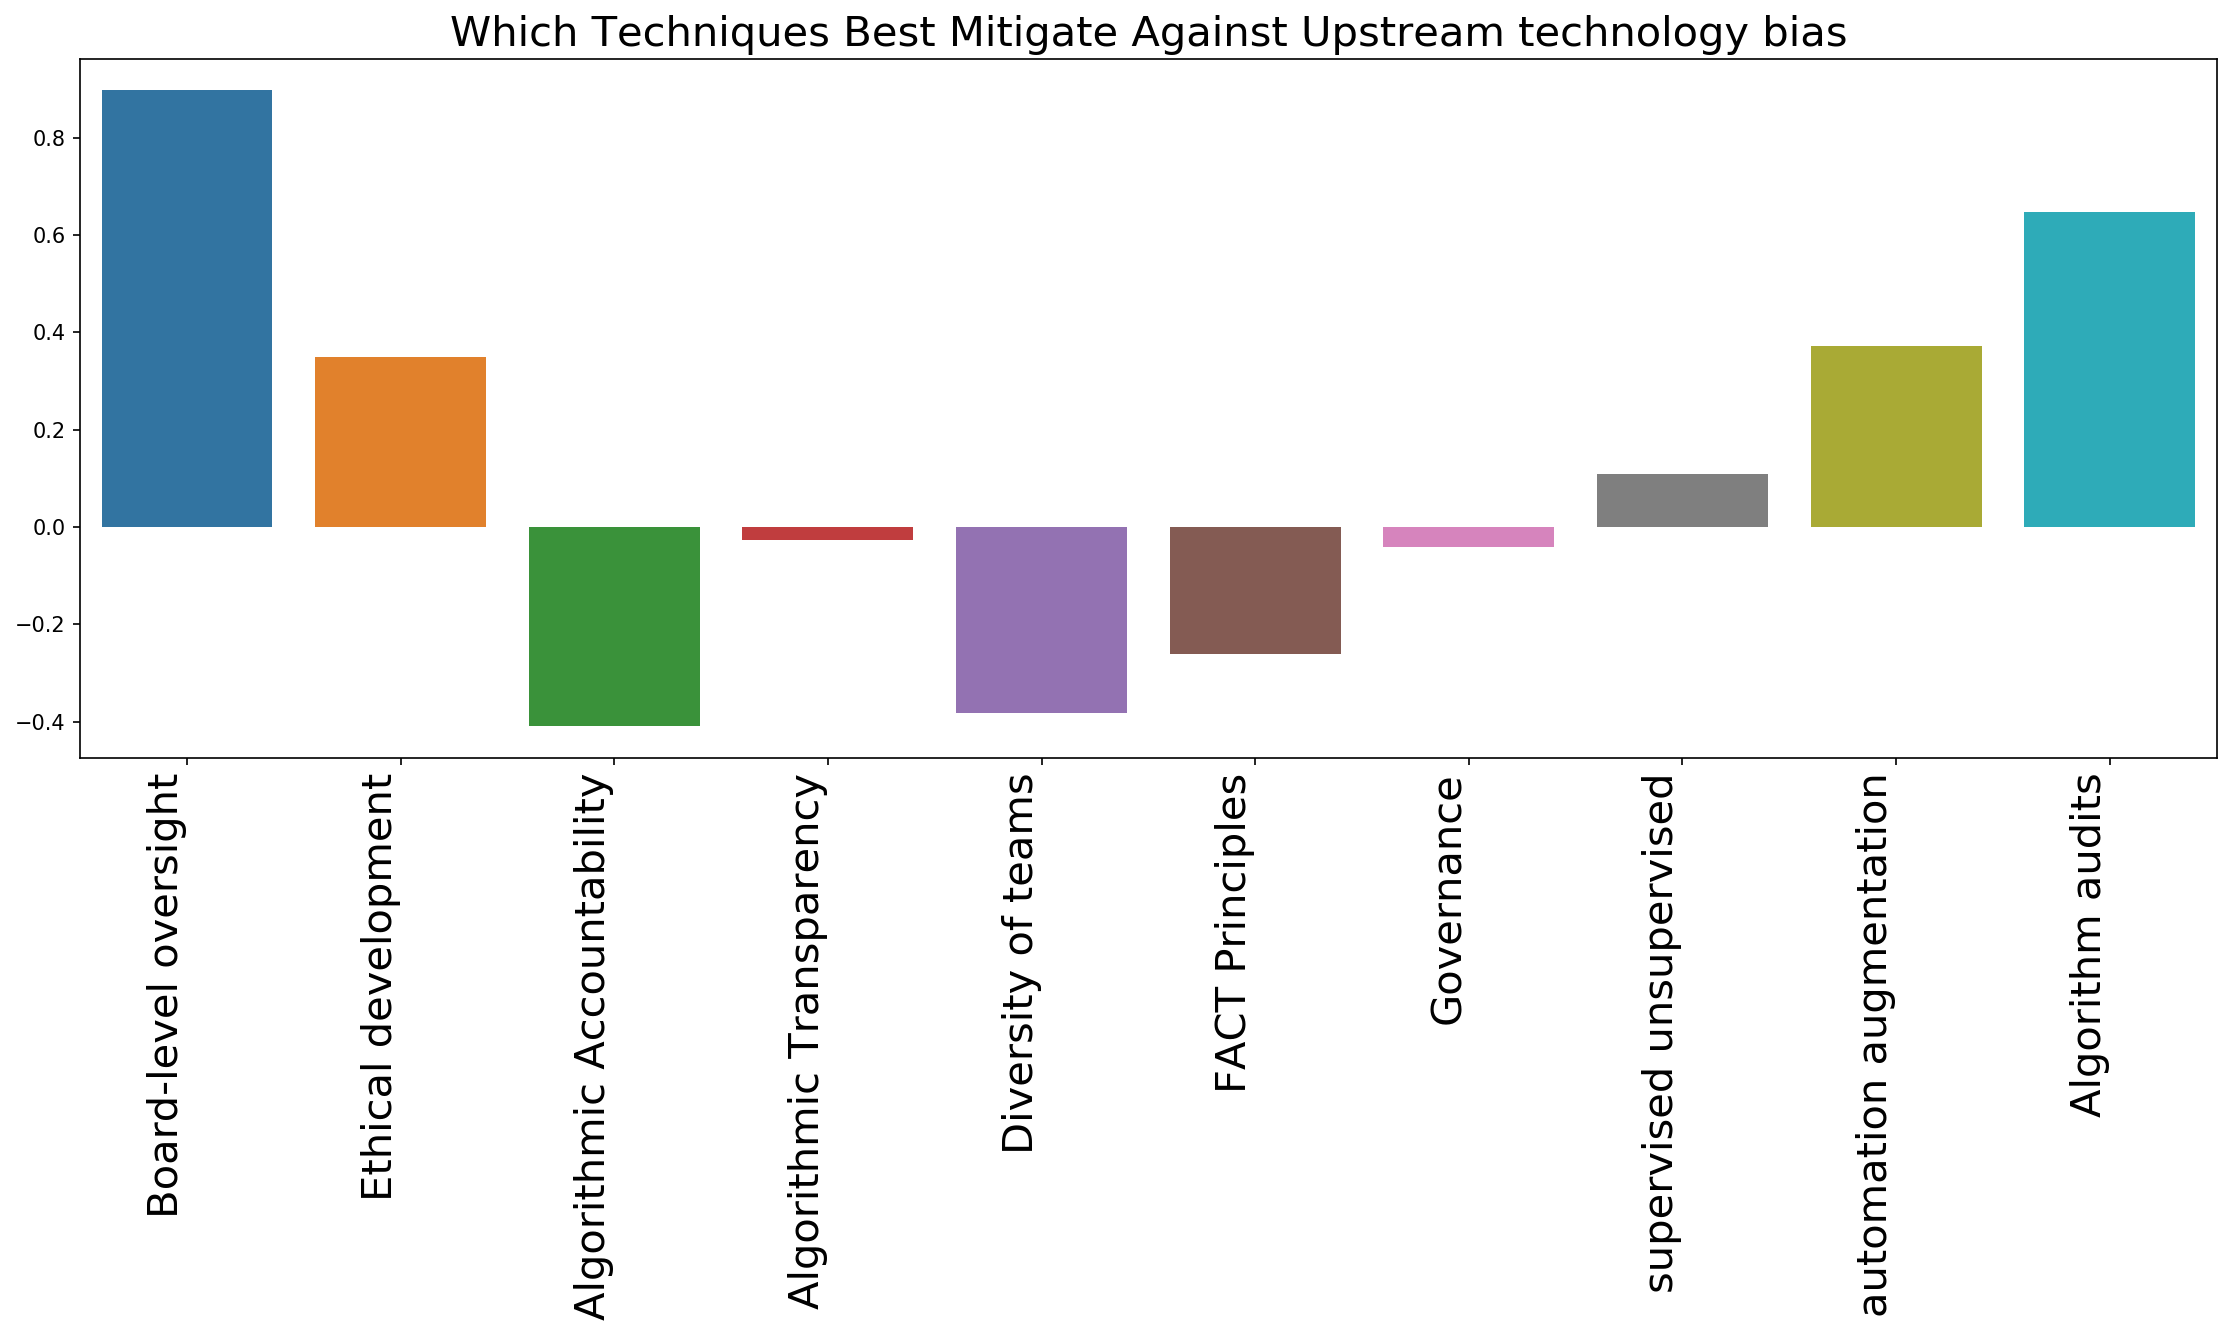

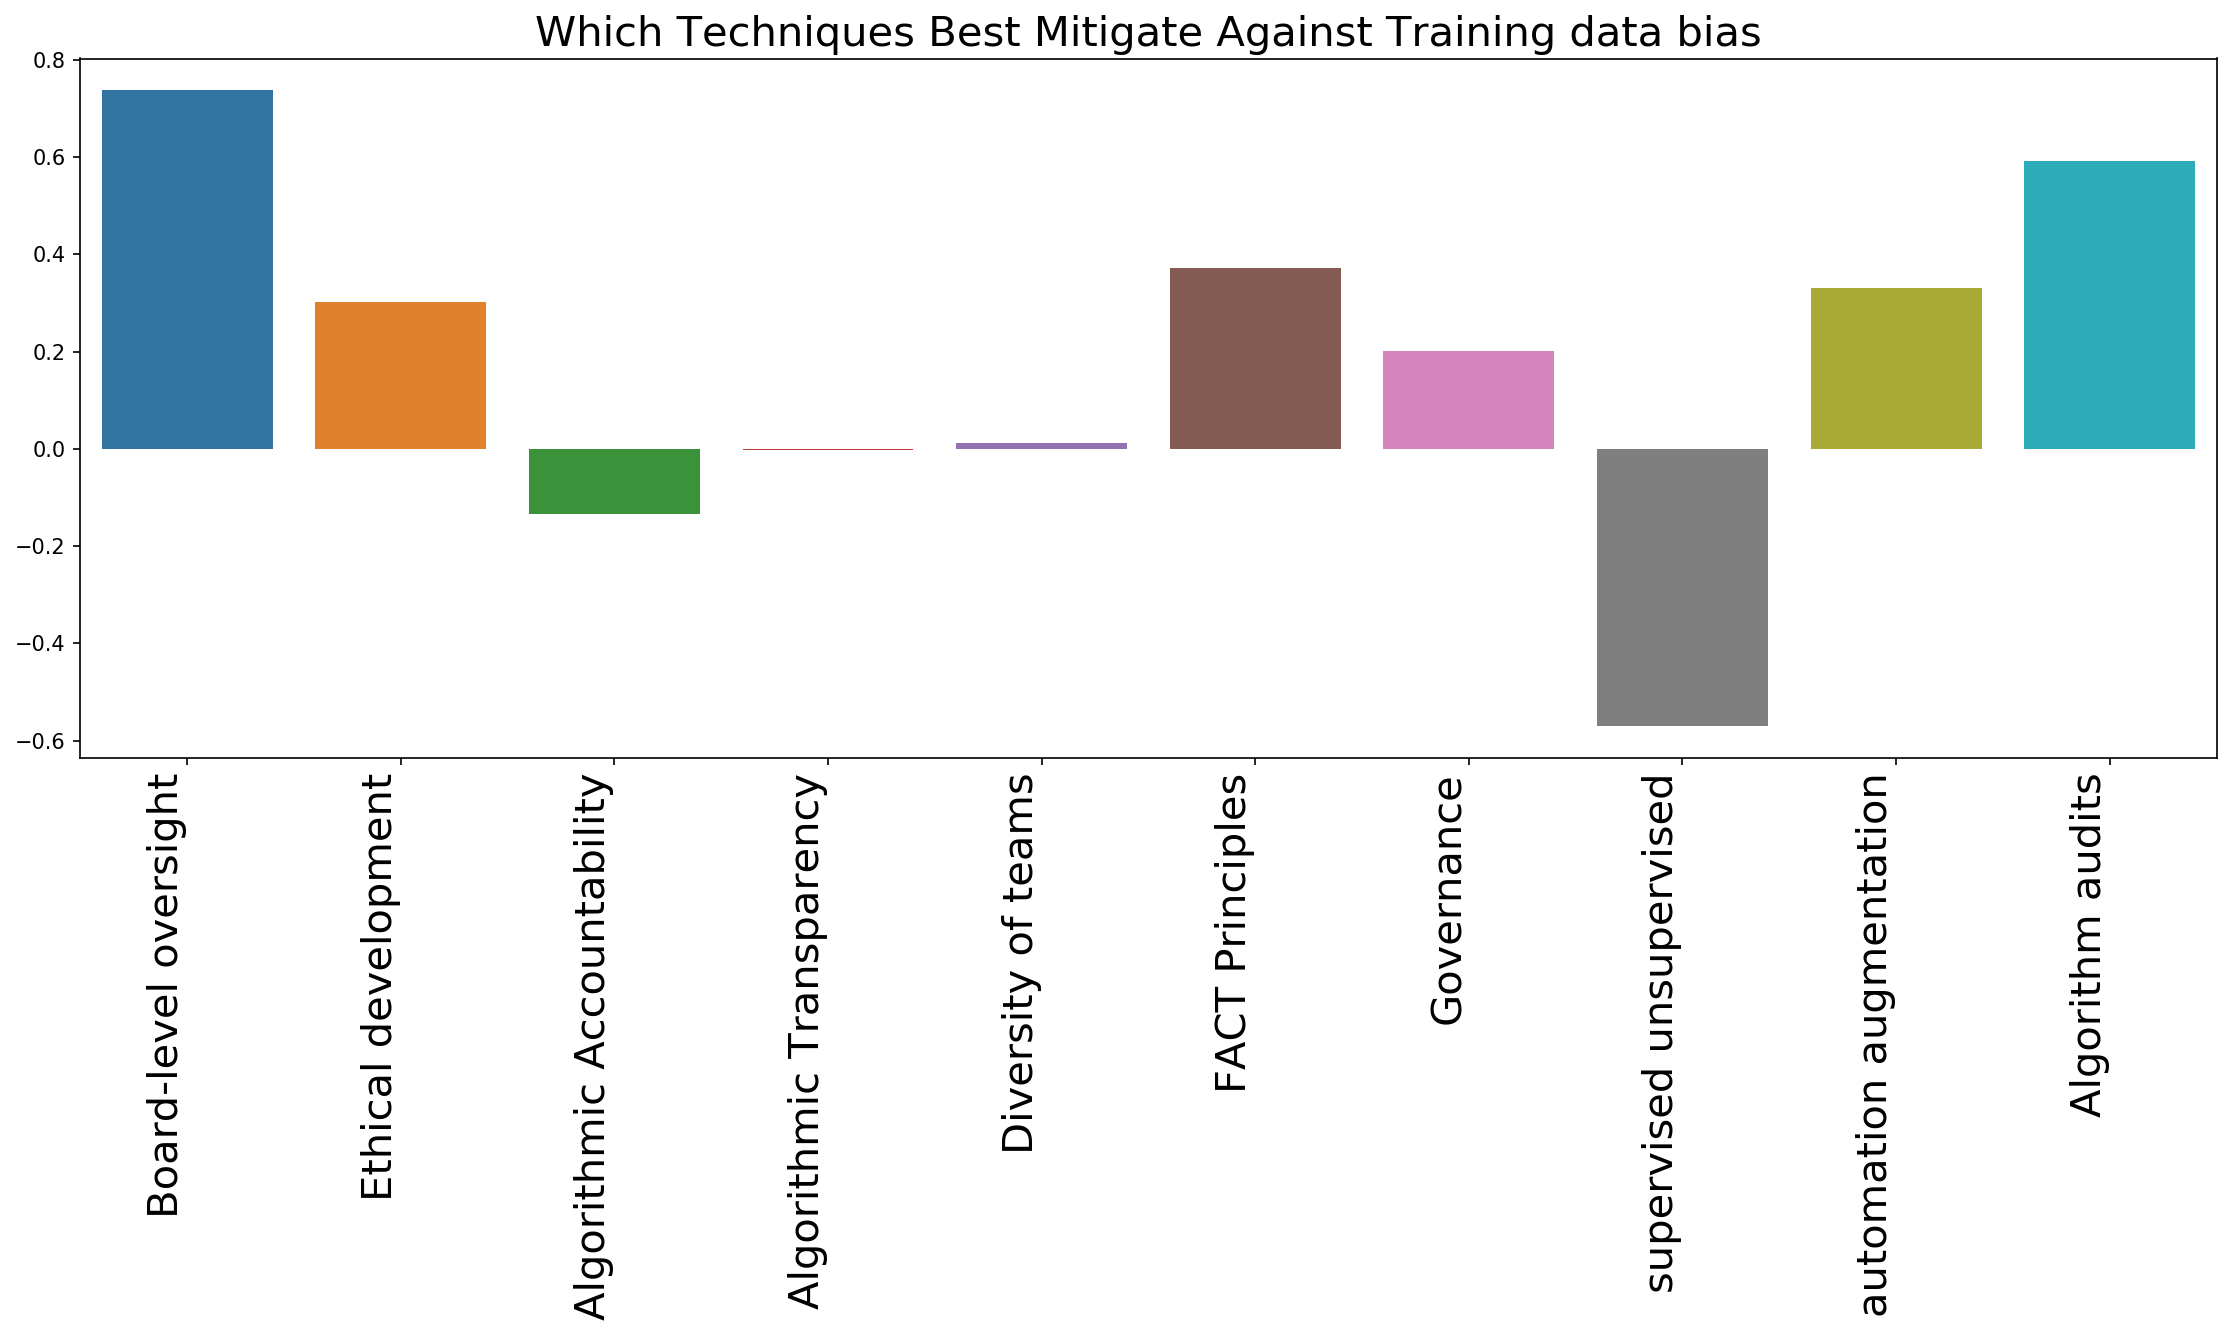

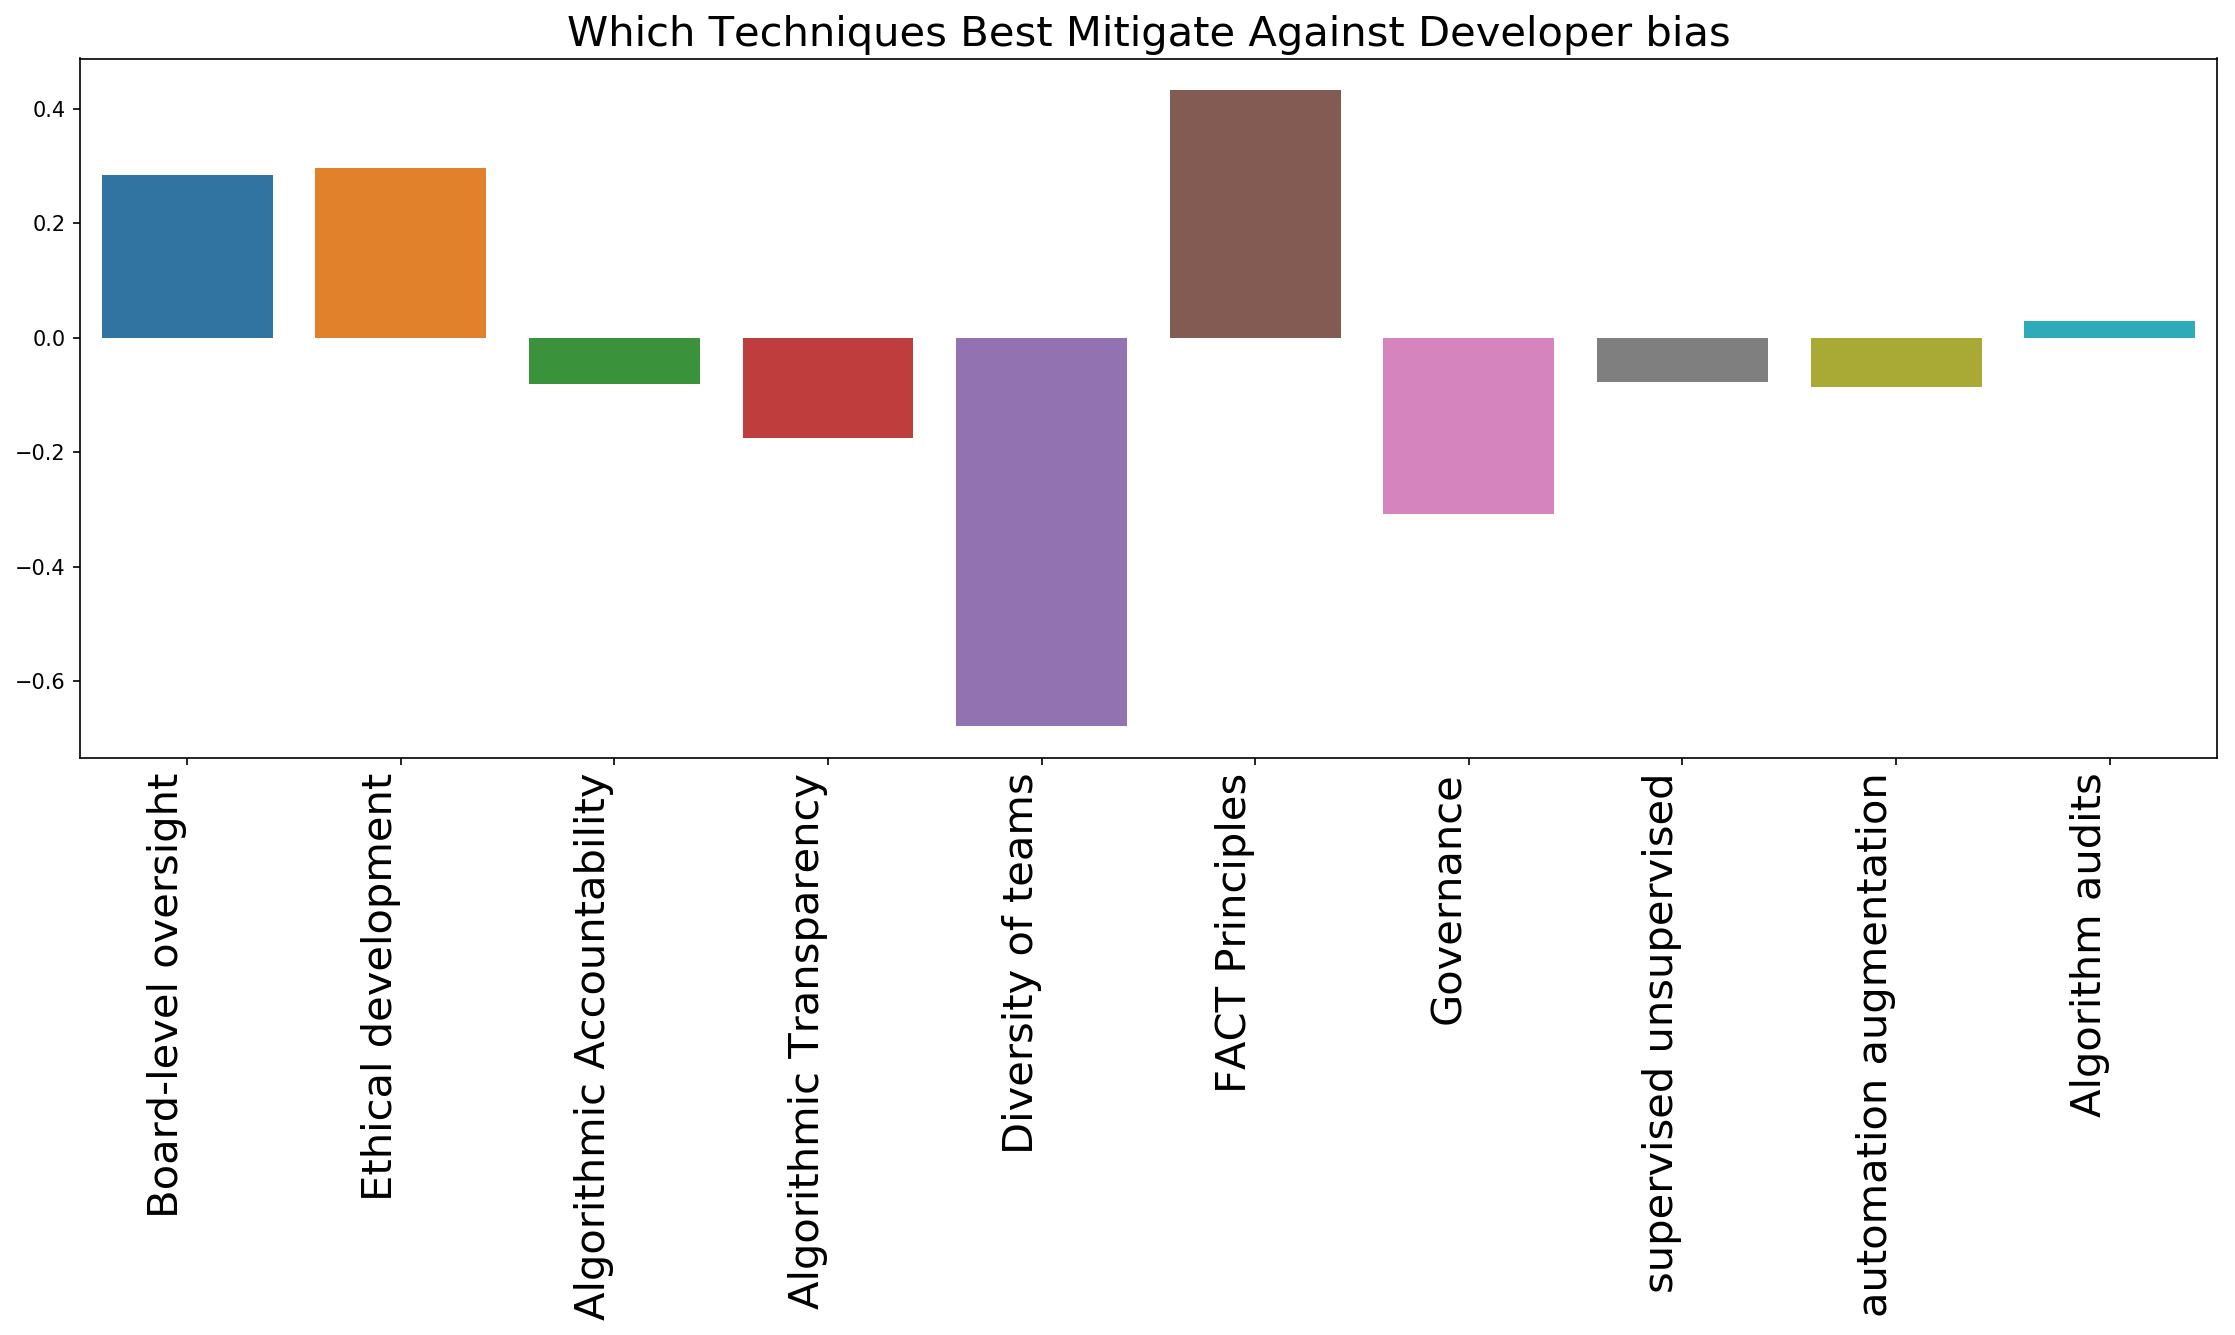

In [ ]:
for i in range(len(biascoeff)):
    title = "Which Techniques Best Mitigate Against {}".format(bias[i])
    plotbar(biascoeff[i], title)

In [85]:
y = df.loc[:,'Magnitude of damage'].values
LogReg = LogisticRegression(penalty='l1', C=0.5, max_iter=500, solver='liblinear', multi_class='auto')
model = LogReg.fit(x,y)
print(model.coef_)

[[ 0.         -0.27196677 -0.09289354  0.          0.11396717  0.47522059
   0.         -0.71108951 -0.9554816   0.        ]
 [ 0.07711961  0.87133438  0.          0.          0.         -0.31785487
   0.          0.00979198  0.         -0.08196895]
 [-0.04981882 -0.22981873  0.          0.          0.          0.
   0.          0.31246728  0.01738411  0.11104763]
 [-0.25034911 -0.72067137  0.         -0.26194199 -0.84809305  0.
  -0.04641602 -0.44061836  0.          0.        ]
 [ 0.         -0.10264038 -0.46076864 -0.04902523 -0.9152519   0.
  -0.0648089   0.         -0.50358514 -0.35487489]]


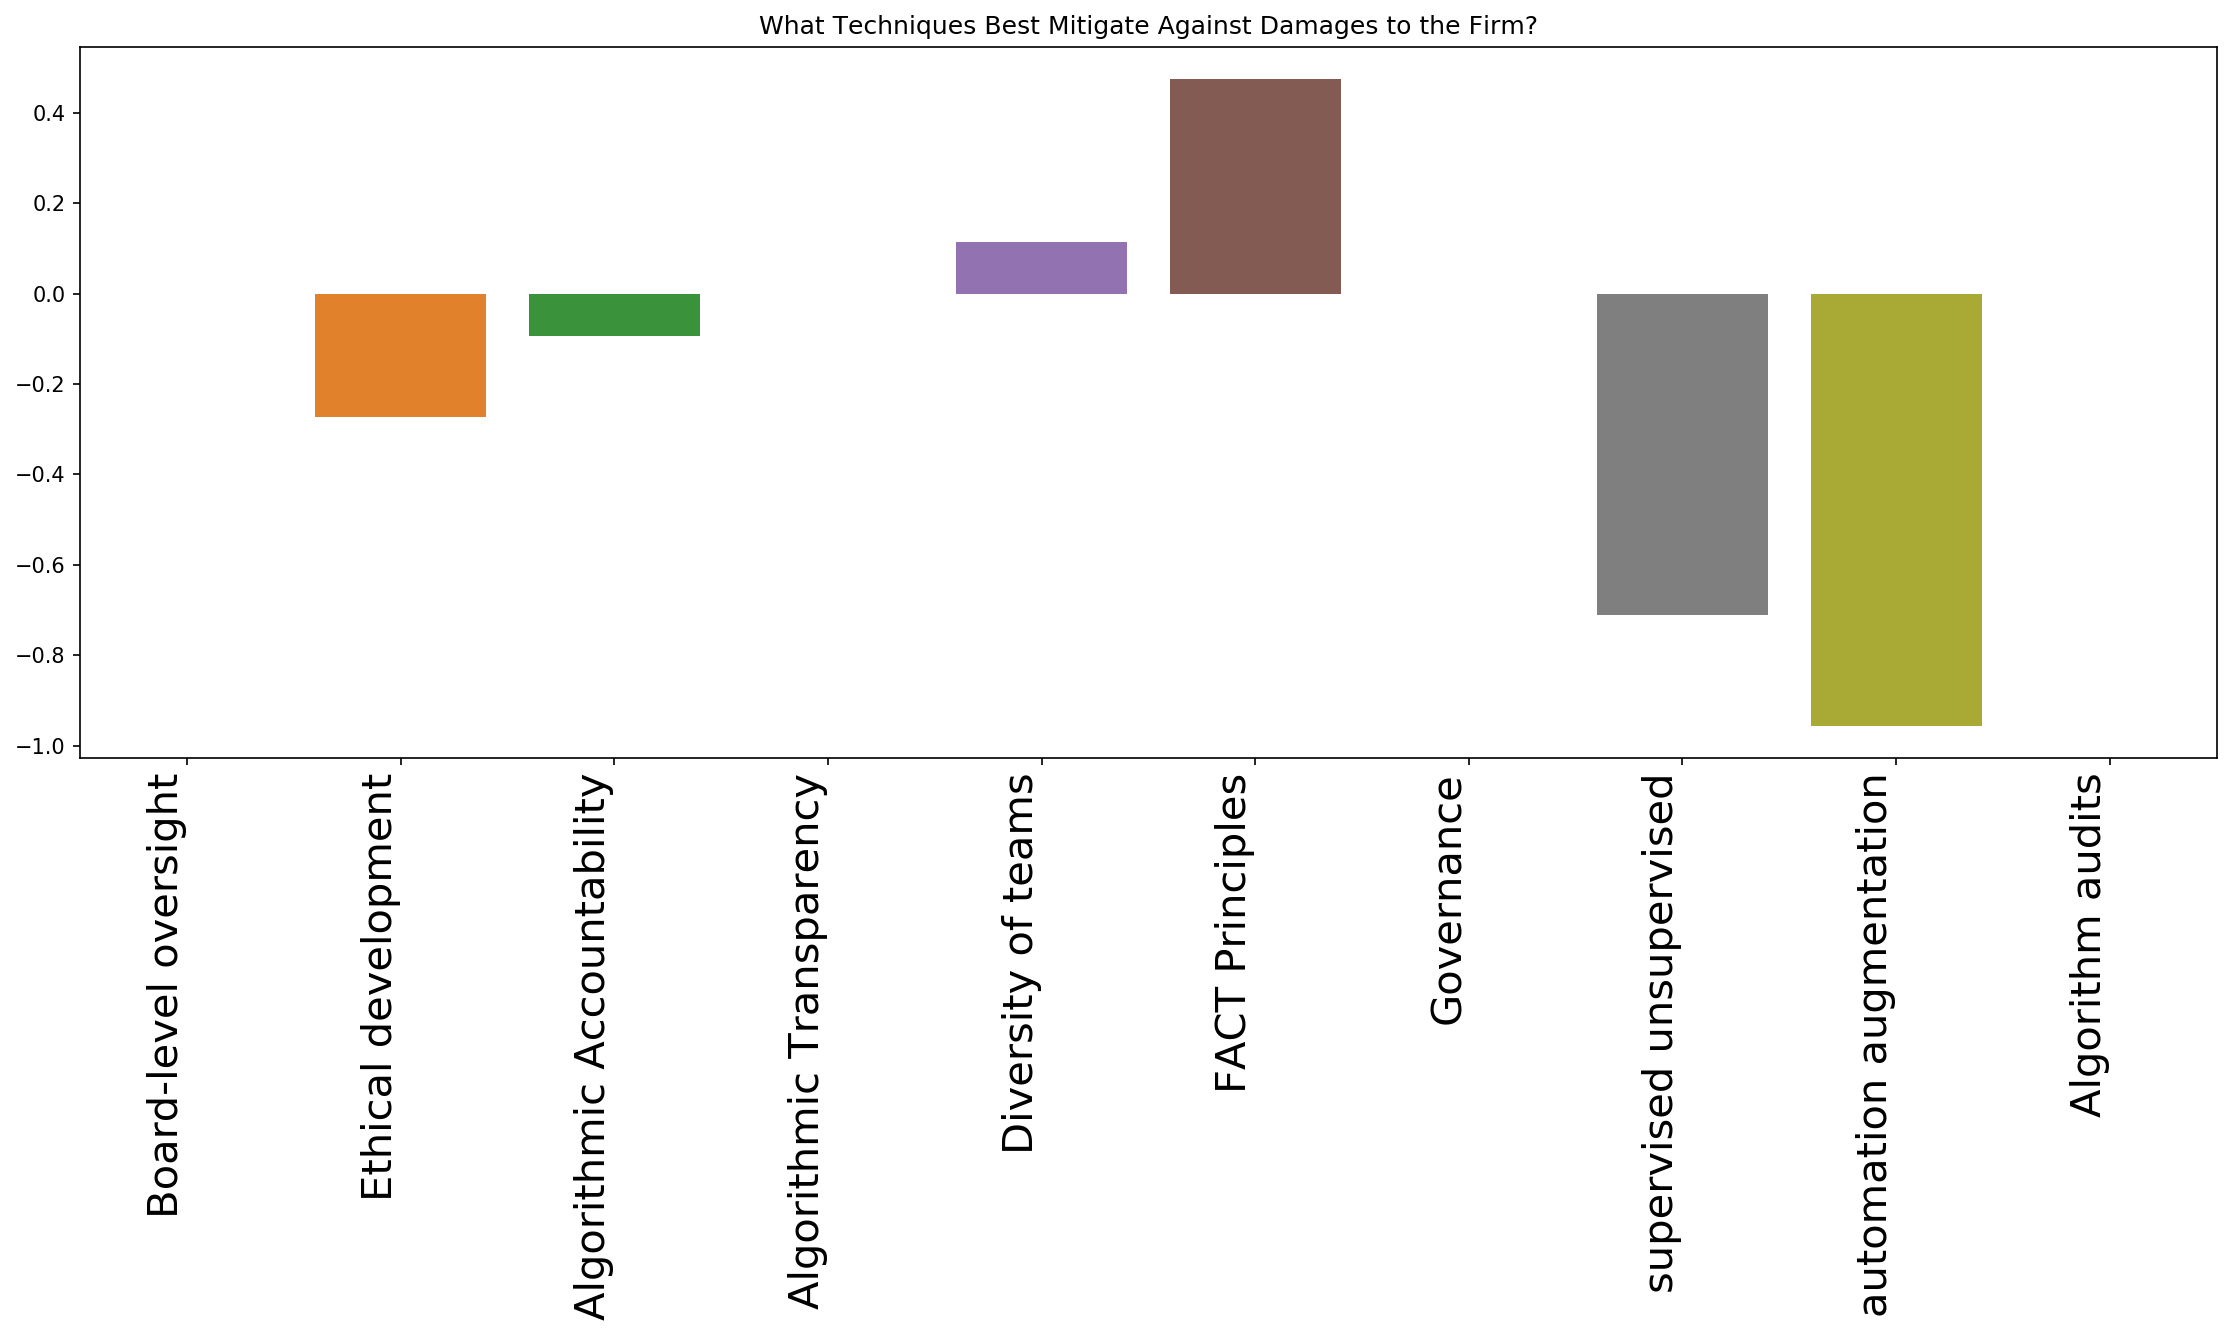

In [89]:
no_damage = [0, -0.2718937,  -0.09285218,  0., 0.1139869, 0.475085, 0., -0.71101784, -0.95548494, 0]
title = "What Techniques Best Mitigate Against Damages to the Firm?"
plotbar(no_damage, title)